In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [29]:
#média de preços
df['price'].mean()


152.7206871868289

In [37]:
#Quartos mais barato
minprice= df['price'].min()
print("preço minimo por quarto:", minprice, "$")
print("onde:")
df.loc[df['price'] == 0, 'neighbourhood_group']


preço minimo por quarto: 0 $
onde:


23161     Brooklyn
25433        Bronx
25634     Brooklyn
25753     Brooklyn
25778     Brooklyn
25794     Brooklyn
25795     Brooklyn
25796     Brooklyn
26259    Manhattan
26841     Brooklyn
26866     Brooklyn
Name: neighbourhood_group, dtype: object

In [38]:
#Quarto mais caro
maxprice= df['price'].max()
print("preço máximo por quarto:", maxprice, "$")
print("onde:")
df.loc[df['price'] == 1000, 'neighbourhood_group']


preço máximo por quarto: 10000 $
onde:


1414         Manhattan
2215         Manhattan
2355         Manhattan
2386         Manhattan
3345         Manhattan
3420         Manhattan
3689         Manhattan
3700         Manhattan
3727         Manhattan
3730         Manhattan
3755         Manhattan
3804         Manhattan
3812         Manhattan
4730          Brooklyn
5432          Brooklyn
5861         Manhattan
6333     Staten Island
6501         Manhattan
6511         Manhattan
6987         Manhattan
8530         Manhattan
11239         Brooklyn
11394         Brooklyn
12740        Manhattan
15107        Manhattan
15833        Manhattan
15837        Manhattan
15890         Brooklyn
16122         Brooklyn
17170         Brooklyn
17652        Manhattan
19236        Manhattan
21176         Brooklyn
22472           Queens
23545           Queens
23694        Manhattan
24540        Manhattan
25516         Brooklyn
27512        Manhattan
27785        Manhattan
29064        Manhattan
30257         Brooklyn
30857        Manhattan
30916      

In [6]:
#média de numero minimo de noites
df['minimum_nights'].mean()

7.029962163820431

In [7]:
#média do numero médio de reviews
df['number_of_reviews'].mean()

23.274465691788528

In [8]:
#média do numero médio de reviews por mês
df['reviews_per_month'].mean()

1.3732214298586884

In [9]:
#média do disponibilidade num ano
df['availability_365'].mean()

112.78132733408324

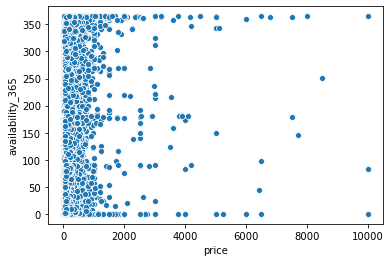

In [10]:
#Relação preço/disponibilidade
Price_Availability1= sns.scatterplot( x =df['price'], y = df['availability_365'])

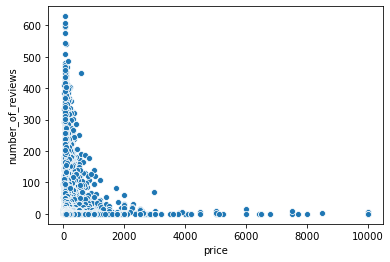

In [11]:
#Relação preço/disponibilidade
Price_numberofreeviews1= sns.scatterplot( x =df['price'], y = df['number_of_reviews'])

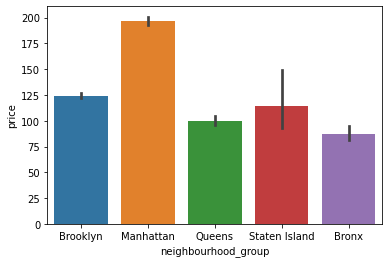

In [12]:
#Relação preço/localização
Price_location1= sns.barplot( x =df['neighbourhood_group'], y = df['price'])

In [63]:
#quantidade de airbnb consuante o preço em cada bairro
NW=pd.Categorical(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island','Bronx'])
pricecut=pd.cut(df['price'],[0, 250, 500, 750, 1000])
Q4=df.groupby(['neighbourhood_group',pricecut])['price'].count()
print(Q4)


neighbourhood_group  price      
Bronx                (0, 250]        1056
                     (250, 500]        27
                     (500, 750]         4
                     (750, 1000]        2
Brooklyn             (0, 250]       18881
                     (250, 500]       985
                     (500, 750]       121
                     (750, 1000]       54
Manhattan            (0, 250]       17916
                     (250, 500]      2971
                     (500, 750]       396
                     (750, 1000]      205
Queens               (0, 250]        5468
                     (250, 500]       169
                     (500, 750]        13
                     (750, 1000]        6
Staten Island        (0, 250]         355
                     (250, 500]        12
                     (500, 750]         2
                     (750, 1000]        2
Name: price, dtype: int64


## Análises intesessantes de utilizadores do kaggle

In [67]:

#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


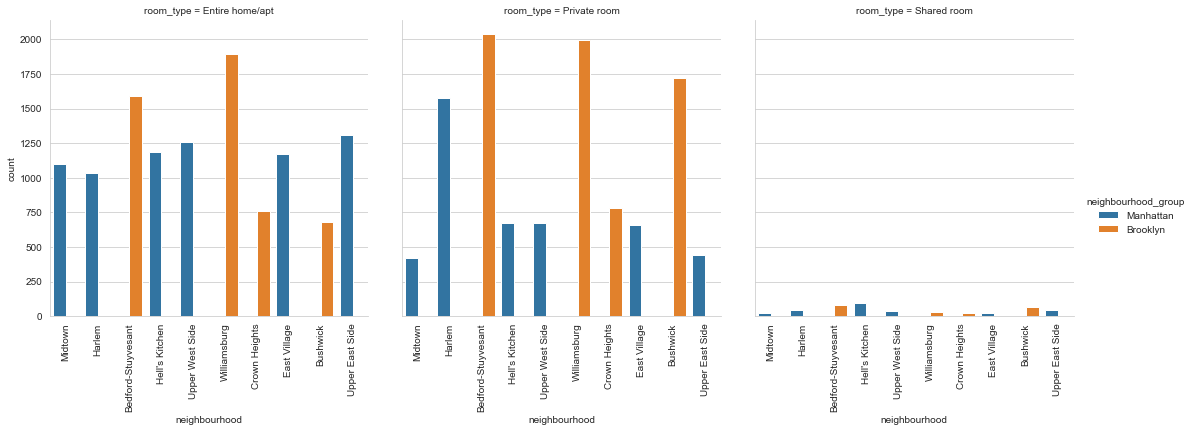

In [68]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

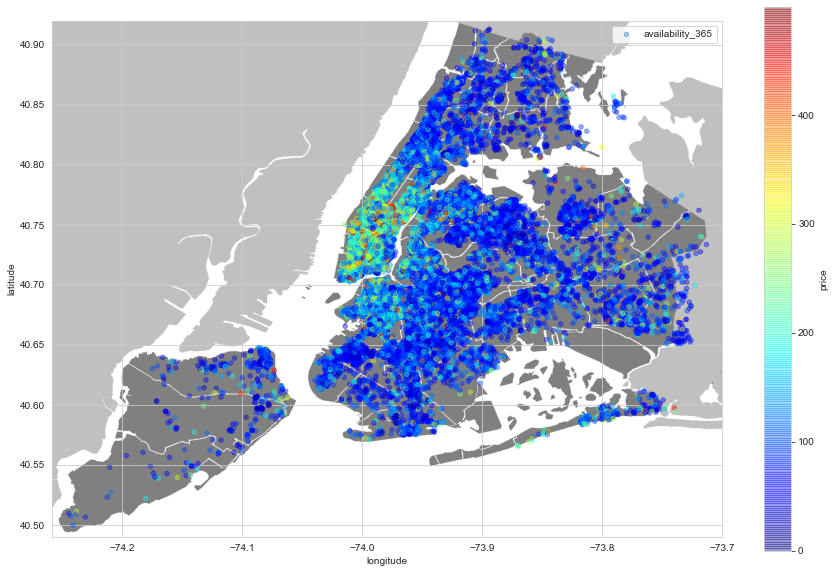

In [76]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
sub_6=df[df.price < 500]
import urllib
#initializing the figure size
plt.figure(figsize=(15,10))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using location scatterplot 
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()